<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('default')

## Importing Data

In [24]:
df = pd.read_csv('Regression_Data.csv')
df.head()

,Ind_Data,Dependent_Data
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Create arrays for feature and target

In [25]:
X = df['Ind_Data'].values
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [26]:
y = df['Dependent_Data'].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

## Visualize

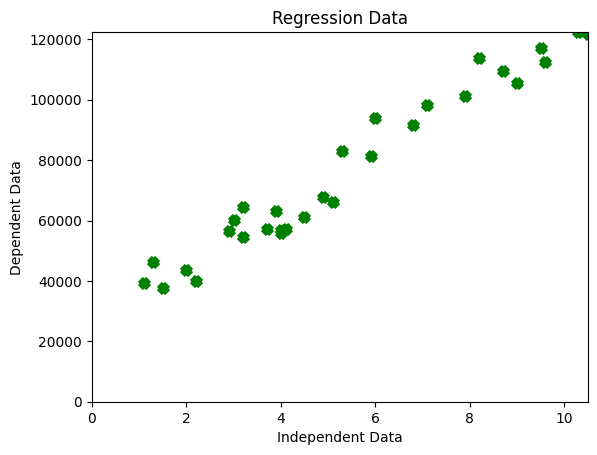

In [28]:
# plt.figure(figsize=(12,8))
plt.scatter(X, y, marker="x", color='g',lw=5)
plt.xlabel('Independent Data')
plt.ylabel('Dependent Data')
plt.xlim([0, X.max()])
plt.ylim([0, y.max()])
plt.title('Regression Data')
plt.show()

## Applying Least Square

### Appending ones at the first column

In [31]:
ones = np.ones((len(X),1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [33]:
X = X.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [34]:
xls = np.concatenate((ones,X),axis=1)
xls

array([[ 1. ,  1.1],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  2. ],
       [ 1. ,  2.2],
       [ 1. ,  2.9],
       [ 1. ,  3. ],
       [ 1. ,  3.2],
       [ 1. ,  3.2],
       [ 1. ,  3.7],
       [ 1. ,  3.9],
       [ 1. ,  4. ],
       [ 1. ,  4. ],
       [ 1. ,  4.1],
       [ 1. ,  4.5],
       [ 1. ,  4.9],
       [ 1. ,  5.1],
       [ 1. ,  5.3],
       [ 1. ,  5.9],
       [ 1. ,  6. ],
       [ 1. ,  6.8],
       [ 1. ,  7.1],
       [ 1. ,  7.9],
       [ 1. ,  8.2],
       [ 1. ,  8.7],
       [ 1. ,  9. ],
       [ 1. ,  9.5],
       [ 1. ,  9.6],
       [ 1. , 10.3],
       [ 1. , 10.5]])

In [35]:
y = y.reshape(-1,1)
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]])

### Step by step Multiplication for the formula

In [36]:
XT = np.transpose(xls) # transpose of X

In [37]:
prod_X = np.matmul(XT, xls) # calculate XT * X

In [38]:
inv_X = np.linalg.inv(prod_X) # calculate inverse of XT * X

In [39]:
XTy = np.matmul(XT, y) # calculate XT * y

In [40]:
wLS = np.matmul(inv_X, XTy) # calculate inverse of XT * y

In [41]:
wLS

array([[25792.20019867],
       [ 9449.96232146]])

In [45]:
w0 = wLS[0].round(2)
w1 = wLS[1].round(2)

In [46]:
w0

array([25792.2])

In [47]:
w1

array([9449.96])

### Interpreting the concept of weight
 - w1 shows that the value of dependent variable increases by 9449.96 if the value of independent variable increases by one unit

## Testing the model

In [48]:
test_data = np.linspace(0,11,30)

In [49]:
test_data

array([ 0.        ,  0.37931034,  0.75862069,  1.13793103,  1.51724138,
        1.89655172,  2.27586207,  2.65517241,  3.03448276,  3.4137931 ,
        3.79310345,  4.17241379,  4.55172414,  4.93103448,  5.31034483,
        5.68965517,  6.06896552,  6.44827586,  6.82758621,  7.20689655,
        7.5862069 ,  7.96551724,  8.34482759,  8.72413793,  9.10344828,
        9.48275862,  9.86206897, 10.24137931, 10.62068966, 11.        ])

In [50]:
test_labels = np.linspace(np.min(y), np.max(y),30)
test_labels

array([ 37731.        ,  40650.31034483,  43569.62068966,  46488.93103448,
        49408.24137931,  52327.55172414,  55246.86206897,  58166.17241379,
        61085.48275862,  64004.79310345,  66924.10344828,  69843.4137931 ,
        72762.72413793,  75682.03448276,  78601.34482759,  81520.65517241,
        84439.96551724,  87359.27586207,  90278.5862069 ,  93197.89655172,
        96117.20689655,  99036.51724138, 101955.82758621, 104875.13793103,
       107794.44827586, 110713.75862069, 113633.06896552, 116552.37931034,
       119471.68965517, 122391.        ])

In [51]:
y_pred = w0 + w1 * test_data # y = w0 + w1*X

In [52]:
y_pred

array([ 25792.2       ,  29376.66758621,  32961.13517241,  36545.60275862,
        40130.07034483,  43714.53793103,  47299.00551724,  50883.47310345,
        54467.94068966,  58052.40827586,  61636.87586207,  65221.34344828,
        68805.81103448,  72390.27862069,  75974.7462069 ,  79559.2137931 ,
        83143.68137931,  86728.14896552,  90312.61655172,  93897.08413793,
        97481.55172414, 101066.01931034, 104650.48689655, 108234.95448276,
       111819.42206897, 115403.88965517, 118988.35724138, 122572.82482759,
       126157.29241379, 129741.76      ])

### Visualize the model performance

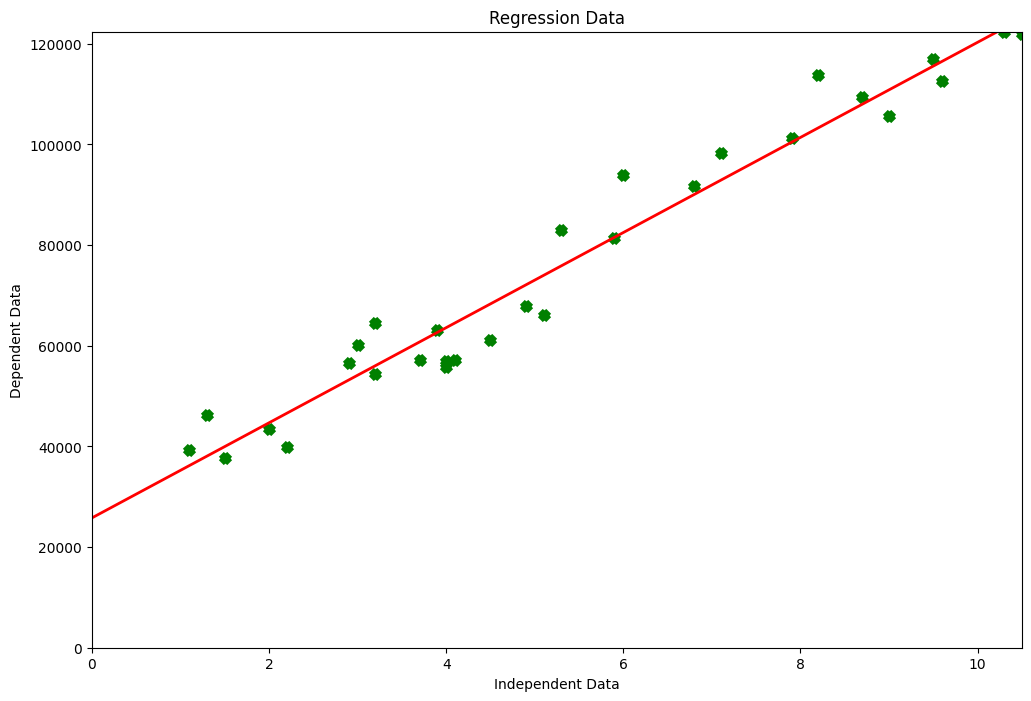

In [55]:
plt.figure(figsize=(12,8))
plt.scatter(X, y, marker="x", color='g',lw=5)
plt.plot(test_data, y_pred, color='r',lw=2)
plt.xlabel('Independent Data')
plt.ylabel('Dependent Data')
plt.xlim([0, X.max()])
plt.ylim([0, y.max()])
plt.title('Regression Data')
plt.show()

## Evaluating Performance

### RMSE

In [56]:
rmse = 0
for i in range(len(test_labels)):
  y_pred = w0 + w1 * test_data[i]
  rmse += (test_labels[i] - y_pred)**2
rmse = np.sqrt(rmse/len(test_labels))

print(f"RMSE{rmse}")

RMSE[6197.43656114]


In [57]:
test_labels

array([ 37731.        ,  40650.31034483,  43569.62068966,  46488.93103448,
        49408.24137931,  52327.55172414,  55246.86206897,  58166.17241379,
        61085.48275862,  64004.79310345,  66924.10344828,  69843.4137931 ,
        72762.72413793,  75682.03448276,  78601.34482759,  81520.65517241,
        84439.96551724,  87359.27586207,  90278.5862069 ,  93197.89655172,
        96117.20689655,  99036.51724138, 101955.82758621, 104875.13793103,
       107794.44827586, 110713.75862069, 113633.06896552, 116552.37931034,
       119471.68965517, 122391.        ])

- RMSE value is much lower than target variable, so model is performing better.

### MAE

In [58]:
mae = 0
for i in range(len(test_labels)):
  y_pred = w0 + w1 * test_data[i]
  mae += abs(test_labels[i] - y_pred)
mae = mae/len(test_labels)

print(f"MAE{mae}")

MAE[5247.93613793]


### R squared

In [59]:
SSE = 0
SST = 0
for i in range(len(test_labels)):
  y_pred = w0 + w1 * test_data[i]
  SSE += (test_labels[i] - y_pred)**2
  SST += (test_labels[i] - np.mean(y))**2
r2 = 1 - SSE/SST

print(f"R2{r2}")

R2[0.94135569]


## Linear Regression using SK-LEARN

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [61]:
lr.fit(X,y) # sklearn uses least square for fitting
print(f"w0: {lr.intercept_}")
print(f"w1: {lr.coef_}")

w0: [25792.20019867]
w1: [[9449.96232146]]


In [62]:
test_data = test_data.reshape(-1,1)

In [63]:
y_pred = lr.predict(test_data)

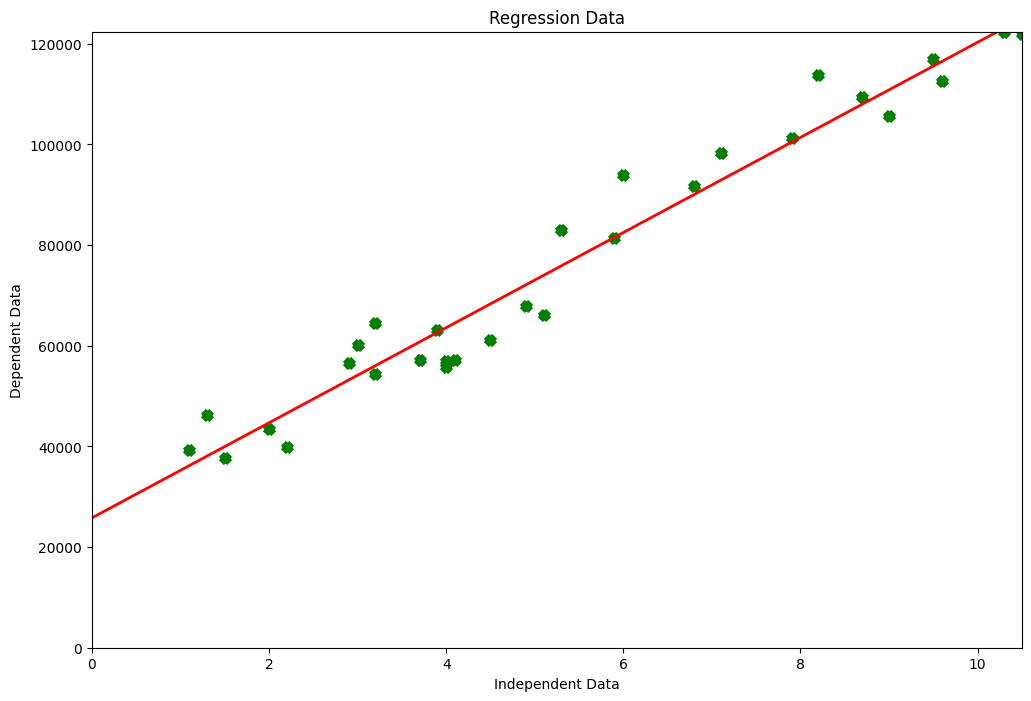

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(X, y, marker="x", color='g',lw=5)
plt.plot(test_data, y_pred, color='r',lw=2)
plt.xlabel('Independent Data')
plt.ylabel('Dependent Data')
plt.xlim([0, X.max()])
plt.ylim([0, y.max()])
plt.title('Regression Data')
plt.show()

In [66]:
from sklearn import metrics
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(test_labels, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(test_labels, y_pred)}")
print(f"R2: {metrics.r2_score(test_labels, y_pred)}")

RMSE: 6197.438841666302
MAE: 5247.939884570575
R2: 0.9398430898737059
